# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Link dataset : https://www.kaggle.com/datasets/mirichoi0218/insurance


# **2. Import Library**

In [10]:
# Mengungah library yang dibutuhkan
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

In [11]:
# Mengungah dataset
uploaded = files.upload()
df = pd.read_csv("insurance.csv")

Saving insurance.csv to insurance (2).csv


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Melihat 5 baris pertama
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Melihat kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Melihat statistik deskriptif
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


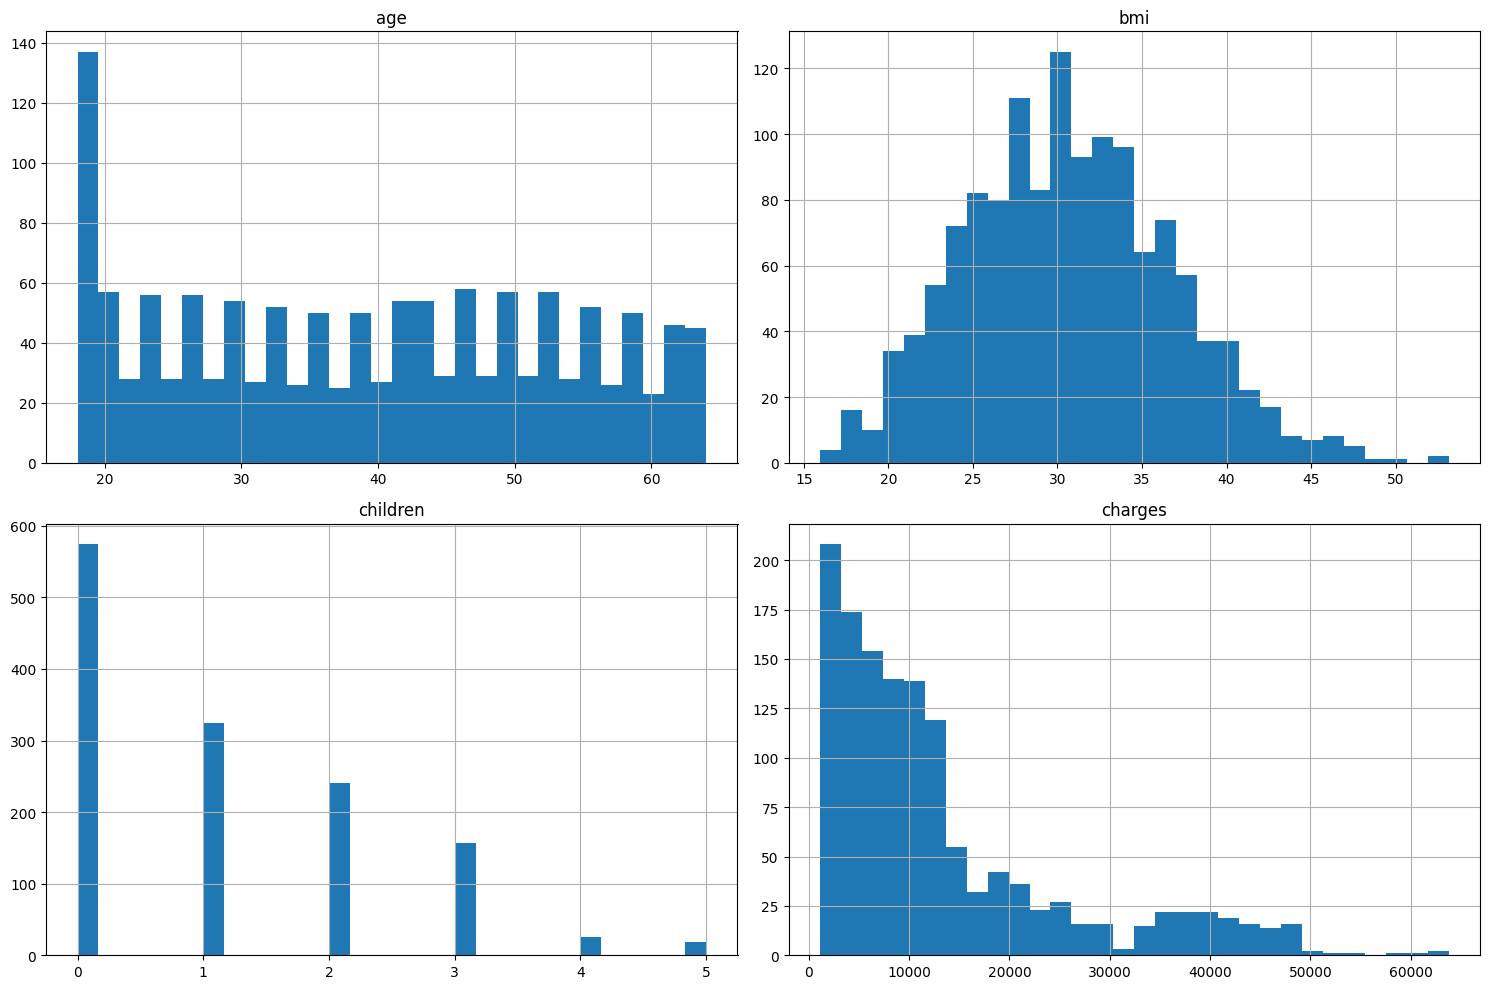

In [8]:
# Melihat distribusi kuantitatif
kolom_numerik = df.select_dtypes(include=np.number).columns.tolist()
df[kolom_numerik].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [12]:
# Melihat data missing value
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [13]:
# Melihat data duplikat
df.duplicated().sum()

np.int64(1)

In [14]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [15]:
# Standarisai kolom numerik menggunakan StandardScaler
scaler = StandardScaler()

df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])

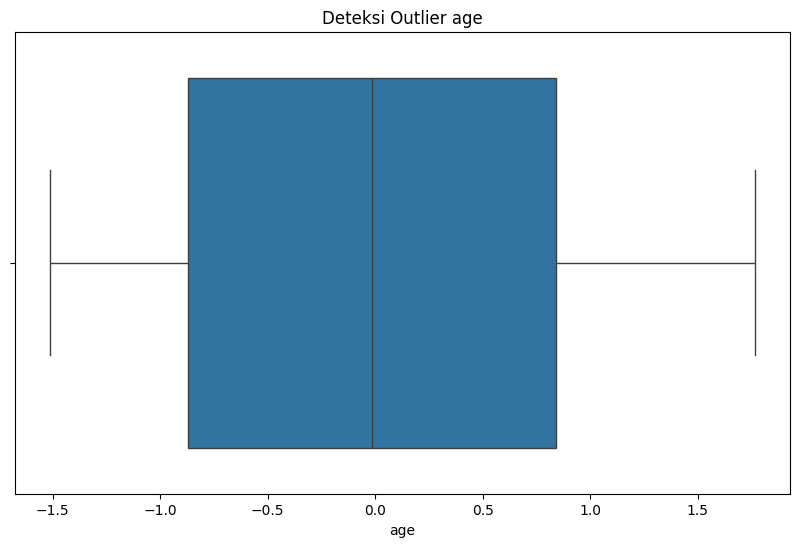

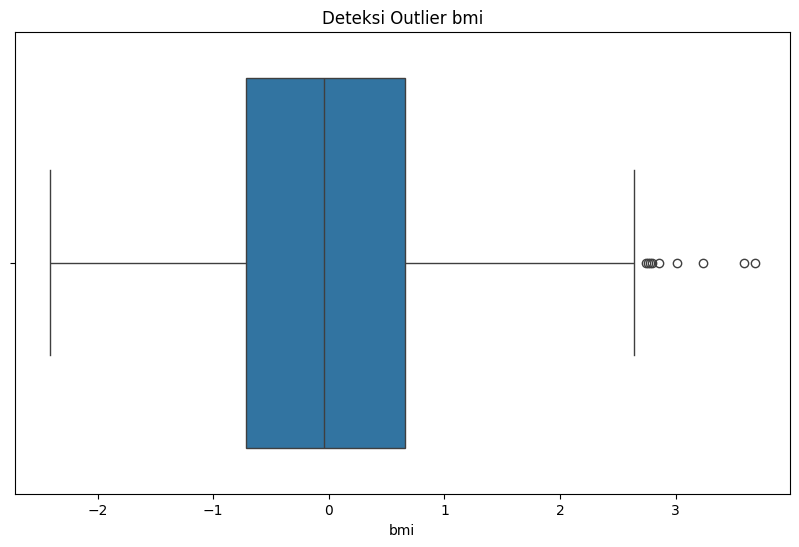

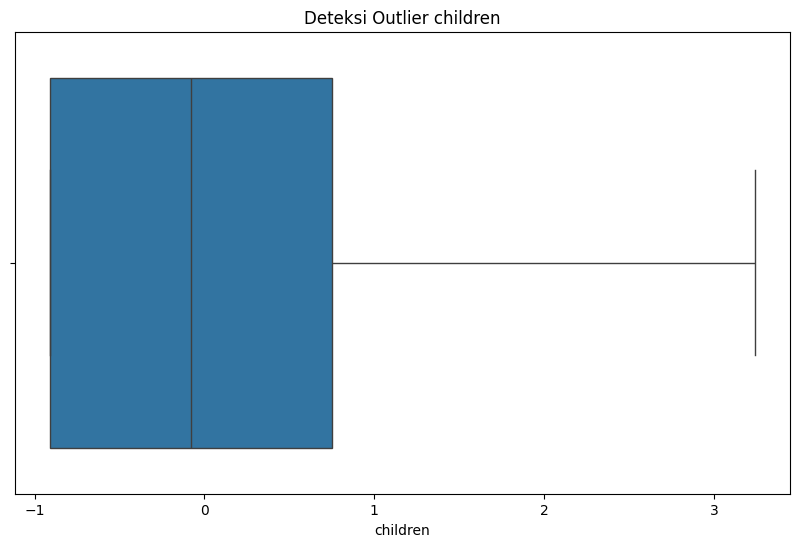

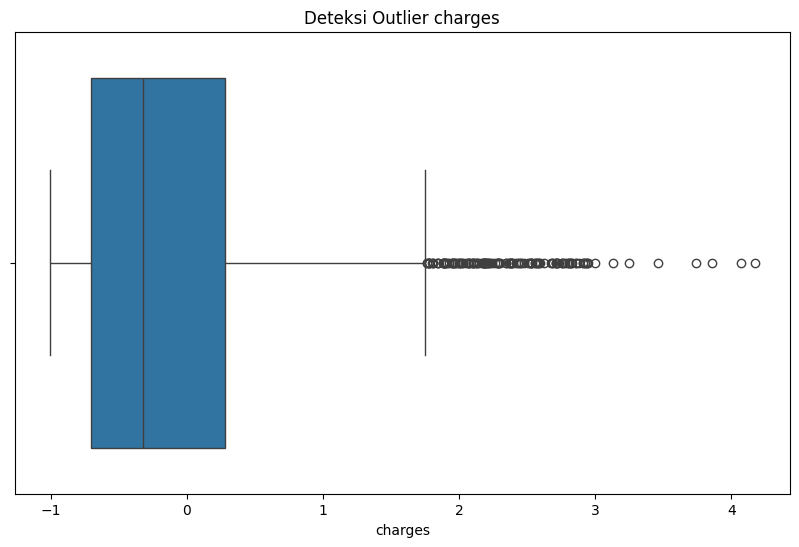

In [16]:
# Melihat outlier
for feature in kolom_numerik:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature])
    plt.title(f'Deteksi Outlier {feature}')
    plt.show()

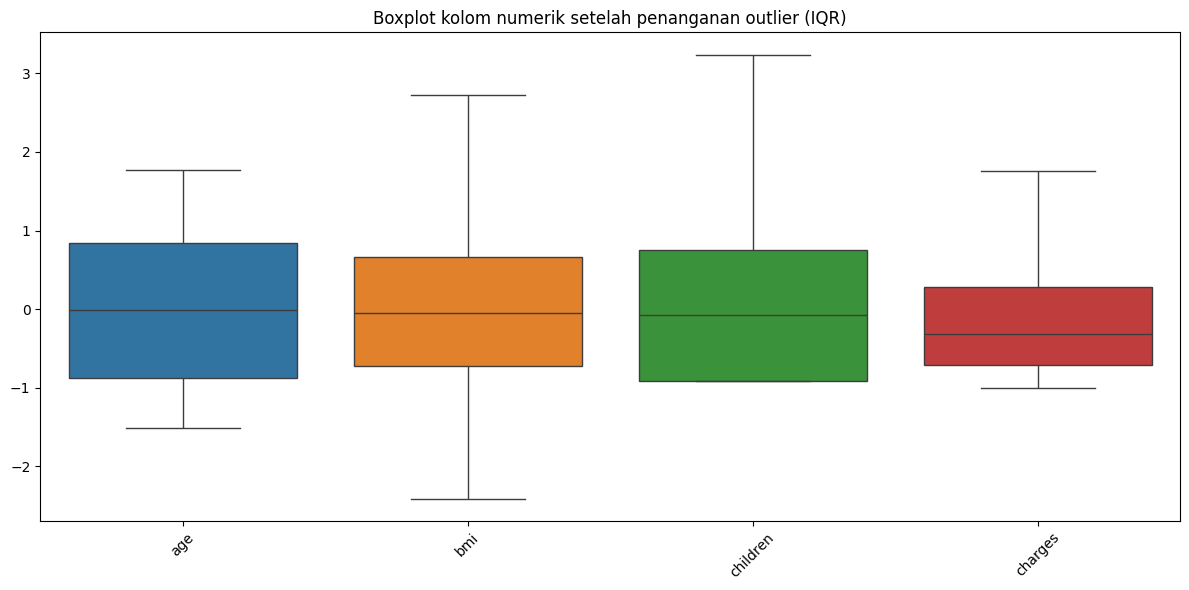

In [17]:
# Mengganti outlier dengan median
for col in kolom_numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower, upper=upper)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kolom_numerik])
plt.title("Boxplot kolom numerik setelah penanganan outlier (IQR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Melakukan encoding kepada kolom kategorikal
kolom_kategori = df.select_dtypes(include=['object']).columns.tolist()

encoders = {}
df = pd.DataFrame(df)

for col in kolom_kategori:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,0,-0.453160,-0.909234,1,3,0.297857
1,-1.511647,1,0.509422,-0.079442,0,2,-0.954381
2,-0.799350,1,0.383155,1.580143,0,2,-0.729373
3,-0.443201,1,-1.305052,-0.909234,0,1,0.719104
4,-0.514431,1,-0.292456,-0.909234,0,1,-0.777499


In [19]:
# Menyimpan dataset hasil preprocessing
df.to_csv("insurance_preprocessing.csv", index=False)

# Mengunduh dataset hasil preprocessing
files.download("insurance_preprocessing.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>